# Support vector machines and model tuning

This notebook, will explore the use of `support vector machines` and model tuning techniques using the scikit-learn library. Specifically, it will implement `SVM classifier` models with both linear and radial basis function kernels. It will visualise the decision boundaries created by these models to understand their effectiveness in classifying data points. Additionally, it will utilise hyperparameter tuning with `GridSearchCV` to optimise the SVM model's performance by finding the best combination of hyperparameters.

Importing the libraries that we will need for this exercise.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

import warnings
warnings.filterwarnings("ignore")

Generating the data and get training and testing data.

In [2]:
from sklearn.datasets import make_gaussian_quantiles

# Set the feature dimensionality
p = 4

# Construct the dataset
X, y = make_gaussian_quantiles(cov=3.,
                                 n_samples=1000, n_features=p,
                                 n_classes=2, random_state=1)

In [3]:
# get training and testing data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Step 1: Fit a SVM classifier with a linear decision boundary
We have a dataset with multiple features, and we want to classify the data into two classes using a support vector machine with a linear decision boundary. By fitting an SVC model with a linear kernel to the training data, we aim to create a decision boundary that separates the classes effectively.

In this step, we:
* Instantiate an SVC classifier with a linear kernel. 
* Fit the classifier to the training data created above and make predictions on the test data.
* Print the accuracy score and classification report to evaluate the model's performance.

In [6]:
from sklearn.svm import SVC

svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

print('Accuracy Score: ', accuracy_score(y_test, y_pred))
print('Classification Report: ', classification_report(y_test, y_pred))

Accuracy Score:  0.45666666666666667
Classification Report:                precision    recall  f1-score   support

           0       0.00      0.00      0.00       163
           1       0.46      1.00      0.63       137

    accuracy                           0.46       300
   macro avg       0.23      0.50      0.31       300
weighted avg       0.21      0.46      0.29       300



### Step 2: Plot the decision boundary for the SVC
After fitting the SVM classifier with a linear kernel, we observe that the accuracy score was not as high as expected. To gain insights into the model's performance and understand why the accuracy was lower, we decided to visualise the decision boundary. By plotting the decision boundary in a two-dimensional space, we aim to visually inspect how well the linear boundary separates the classes.

In this step, we:
* Plot the decision boundary for the SVM classifier with a linear kernel.

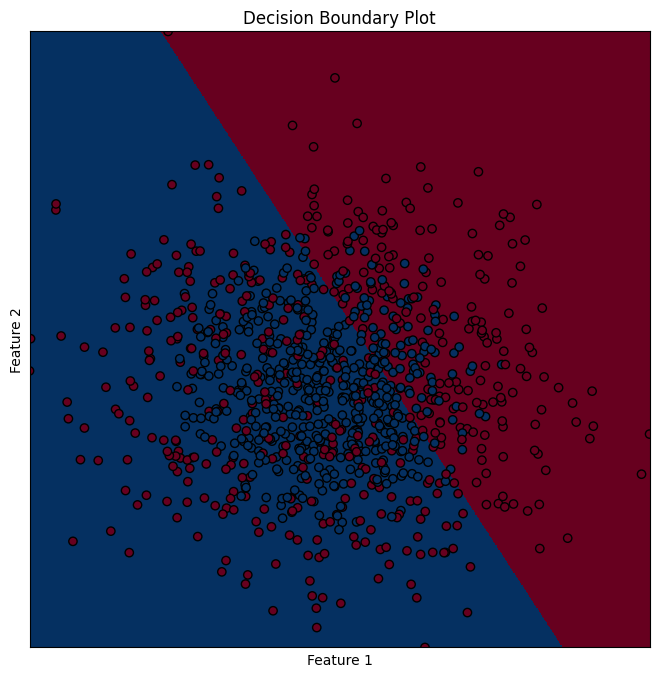

In [7]:
i = 0 # Feature 1
j = 1 # Feature 2

svc.fit(X[:, [i, j]], y)
fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot(111)
 
x_min, x_max = X[:, i].min(), X[:, i].max()
y_min, y_max = X[:, j].min(), X[:, j].max()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000), np.linspace(y_min, y_max, 1000))

y_hat = svc.predict(np.concatenate((xx.reshape(-1,1), yy.reshape(-1,1)), axis=1))
y_hat = y_hat.reshape(xx.shape)

ax1.pcolormesh(xx, yy, y_hat, cmap=plt.cm.get_cmap('RdBu_r'))
ax1.scatter(X[:, i], X[:, j], c=y, edgecolors='k', cmap=plt.cm.get_cmap('RdBu_r'))
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.set_title('Decision Boundary Plot') 
ax1.set_xlim(xx.min(), xx.max())
ax1.set_ylim(yy.min(), yy.max())
ax1.set_xticks(())
ax1.set_yticks(())
plt.show()

Based on the visualisation of the decision boundary, we can infer that the linear decision boundary is not effective in separating the classes. The decision boundary appears to be a straight line, which fails to adequately separate the data points of the two classes. As a result, the linear boundary does not capture the underlying structure of the data well, leading to poor classification performance. Therefore, based on the visualisation, we can conclude that the linear decision boundary is not suitable for this dataset and may require a more complex boundary, such as a non-linear boundary, to improve classification performance.

### Step 3: Fit a SVC classifier with a non-linear decision boundary

Recognising the limitations of the linear decision boundary, we fit an SVC model with an RBF kernel to the training data and evaluate its performance on the test set.

In this step, we:

* Use the provided code to fit an SVC model with an RBF kernel to the training data.
* Make predictions on the test data.
* Print the accuracy score and classification report to evaluate the performance of the model.

In [9]:
svc1 = SVC(kernel='rbf')
svc1.fit(X_train, y_train)
y_pred1 = svc1.predict(X_test)

print('Accuracy Score: ', accuracy_score(y_test, y_pred1))
print('Classification Report: ', classification_report(y_test, y_pred1))

Accuracy Score:  0.9766666666666667
Classification Report:                precision    recall  f1-score   support

           0       0.98      0.98      0.98       163
           1       0.98      0.97      0.97       137

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300



The use of the RBF kernel significantly improved the accuracy of the SVM classifier compared to the linear kernel. The accuracy score of the SVM classifier with the RBF kernel is 0.976, whereas in Exercise 1, the accuracy score of the SVM classifier with the linear kernel was only 0.457. This substantial increase in accuracy suggests that the RBF kernel better captures the non-linear relationships within the data, allowing the SVM model to create a more flexible decision boundary. As a result, the RBF kernel achieves higher precision, recall, and F1-score for both classes, indicating better overall performance in classifying the data points.

### Step 4: Plot the decision boundary for the SVC using the non-linear RBF kernel

After observing a significant improvement in accuracy with the RBF kernel, we visualise the decision boundary created by the non-linear RBF kernel in a two-dimensional space.

In this step, we:

* Plot the decision boundary for the SVM classifier with an RBF kernel.
* Compare the decision boundary visualisation of the RBF kernel with the linear kernel.
* Make observations about the differences between the two visualisations.

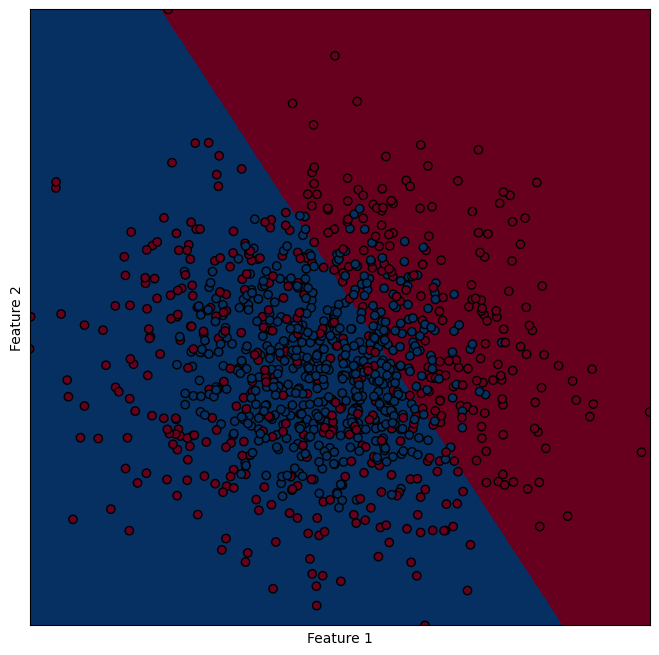

In [26]:
i = 0 # Feature 1
j = 1 # Feature 2

svc.fit(X[:, [i, j]], y)
fig = plt.figure(figsize=(8, 8))
ax1 = fig.add_subplot(111)
 
x_min, x_max = X[:, i].min(), X[:, i].max()
y_min, y_max = X[:, j].min(), X[:, j].max()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000), np.linspace(y_min, y_max, 1000))

y_hat = svc.predict(np.concatenate((xx.reshape(-1,1), yy.reshape(-1,1)), axis=1))
y_hat = y_hat.reshape(xx.shape)

ax1.pcolormesh(xx, yy, y_hat, cmap=plt.cm.get_cmap('RdBu_r'))
ax1.scatter(X[:, i], X[:, j], c=y, edgecolors='k', cmap=plt.cm.get_cmap('RdBu_r'))
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')
ax1.set_xlim(xx.min(), xx.max())
ax1.set_ylim(yy.min(), yy.max())
ax1.set_xticks(())
ax1.set_yticks(())
plt.show()

After plotting the decision boundary for the SVC using the non-linear RBF kernel, we observe significant differences compared to the linear kernel boundary visualisation. The decision boundary created by the RBF kernel appears to be more complex and non-linear, effectively capturing the intricate relationships between the data points of different classes. Unlike the linear boundary, which was a straight line, the RBF kernel boundary curves and adapts to the shape of the data clusters, resulting in better separation between classes.

### Step 5: Tuning an SVM model

To further optimise the SVM model's performance, we utilise hyperparameter tuning using GridSearchCV. We perform a grid search to find the best combination of hyperparameters that maximises model accuracy on the test data.

In this step, we:

* Define a parameter grid containing different values for the kernel, C, and gamma parameters.
* Instantiate an SVC classifier.
* Perform a grid search using GridSearchCV with the defined parameter grid.
* Fit the grid search object to the training data.
* Make predictions on the test data using the best-tuned model obtained from the grid search.
* Print the accuracy score to evaluate the performance of the tuned model.

In [20]:
parameters = { 'kernel' : ('linear', 'rbf'),
              'C' : (0.001, 0.05, 0.1, 1, 2, 5, 10, 20),
              'gamma' : (0.1, 2.9)}

svm = SVC()
clf = GridSearchCV(svm, parameters)
clf.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': (0.001, 0.05, 0.1, 1, 2, 5, 10, 20),
                         'gamma': (0.1, 2.9), 'kernel': ('linear', 'rbf')})

In [22]:
y_pred2 = clf.predict(X_test)

print('Accuracy Score: ', accuracy_score(y_test, y_pred2))

Accuracy Score:  0.9666666666666667


Hyperparameter tuning with techniques like GridSearchCV aims to optimise the SVM model's performance by finding the best combination of hyperparameters. GridSearchCV systematically searches through a predefined grid of hyperparameters and evaluates the model's performance using cross-validation. By selecting the hyperparameter combination that maximises a chosen performance metric, such as accuracy or F1-score, GridSearchCV helps improve the model's accuracy and generalisation ability. Overall, hyperparameter tuning ensures that the SVM model is trained with the most suitable settings for the given dataset, preventing overfitting or underfitting and enhancing its robustness across different datasets and conditions.